In [37]:
import pandas as pd
import xlsxloader as xl
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

# Load the data from the xlsx file
df = xl.XlsxLoader.load_data()[0]

# Make sure all the data is displayed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# A heading is found and removed from the data
df = df.iloc[1: , :]

# The columns are renamed
df = df.rename(columns = {"Chart": "Date and time", "Unnamed: 1": "Players", "Unnamed: 2": "Average"})

print("------------------- Dataframe information -------------------")
print(df.shape)
print(df.isnull().sum()) 
# This provides a large number of missing values on second column as the average is only taken after 2022
# Also, after 30/01/2024, the player count is taken in minutes, not in hours

1 files found
------------------- Dataframe information -------------------
(5990, 3)
Date and time       0
Players           163
Average          4790
dtype: int64


In [38]:
# Format cell types
print("------------------- Dataframe types -------------------")
print(df.dtypes)
df['Date and time'] = pd.to_datetime(df['Date and time'], errors='coerce')
df['Players'] = pd.to_numeric(df['Players'], errors='coerce')
df['Average'] = pd.to_numeric(df['Average'], errors='coerce')
print(df.dtypes)

------------------- Dataframe types -------------------
Date and time    object
Players          object
Average          object
dtype: object
Date and time    datetime64[ns]
Players                 float64
Average                 float64
dtype: object


In [39]:
# Drop the rows with missing values
print("------------------- Dataframe missing values -------------------")
print(df.isnull().sum()) 

# The missing players are dropped
# Alternatively, the next or last value could be used to fill the missing values
# df = df.bfill()
# df = df.ffill()
df = df.dropna(subset=["Players"])

# The missing average values are filled with the player count
df["Average"] = df["Average"].fillna(df["Players"])

print(df.isnull().sum())

------------------- Dataframe missing values -------------------
Date and time       0
Players           163
Average          4790
dtype: int64
Date and time    0
Players          0
Average          0
dtype: int64


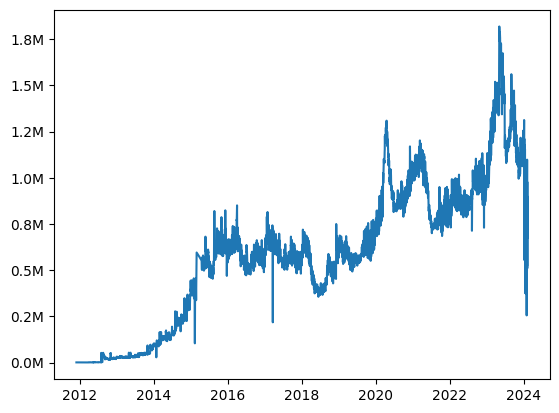

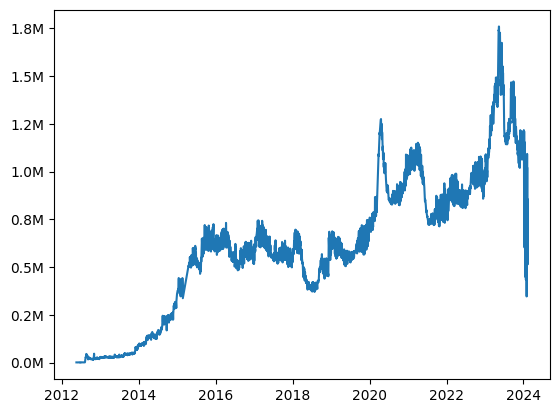

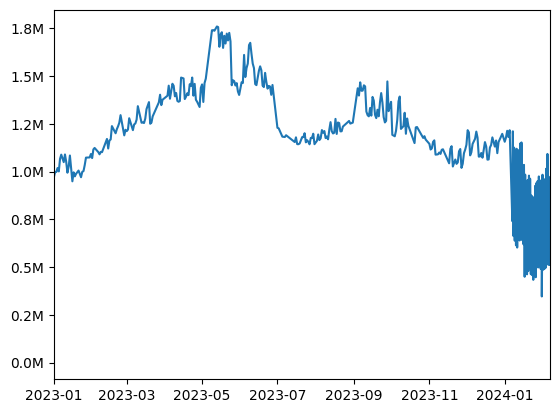

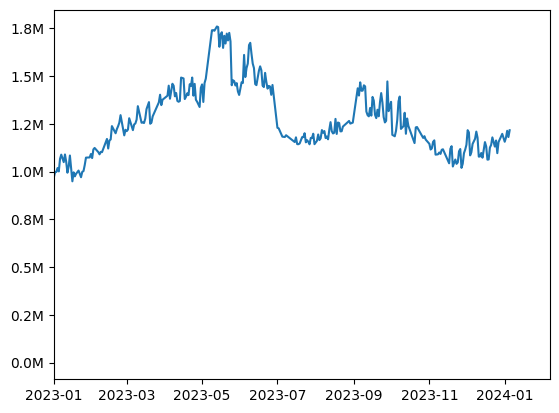

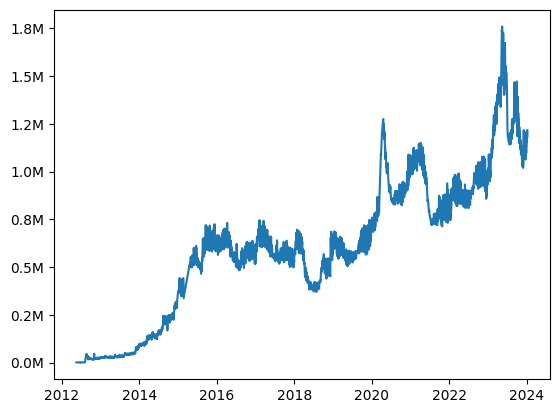

In [42]:
import matplotlib.ticker as ticker

plt.figure(0)
plt.plot(df["Date and time"], df["Players"])

# Format the left axis to display values in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

# As seen in the plot, there are some extreme values that are not representative of the data
# The data will be filtered to remove these values

# Assuming df is your DataFrame and 'Datetime' is the column with the date
df.set_index('Date and time')

# Define window size
window_size = 60

# Calculate rolling quantiles
lower_bound = df['Players'].rolling(window_size).quantile(0.05)
upper_bound = df['Players'].rolling(window_size).quantile(0.95)

# Create mask for values within bounds
mask = (df['Players'] >= lower_bound) & (df['Players'] <= upper_bound)

# Filter the DataFrame
df_filtered = df[mask]

# Plot the filtered data
plt.figure(1)
plt.plot(df_filtered["Date and time"], df_filtered["Players"])
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

# An inconsistency can be seen towards the end of the data
# This is due to the player count being measured every hour instead of every day, as it was before 7th January 2024
# Also, after 30/01/2024, the player count is taken in minutes, not in hours

# By zooming in on the plot, we can see the inconsistency directly
# Plot for date range of 2023 to 2024
plt.figure(2)
plt.plot(df_filtered["Date and time"], df_filtered["Players"])
plt.xlim(datetime(2023, 1, 1), datetime.now())
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

# The data after 7/01/2024 is removed
df_filtered = df_filtered[df_filtered["Date and time"] < datetime(2024, 1, 7)]

# Plot for date range of 2023 to 2024
plt.figure(3)
plt.plot(df_filtered["Date and time"], df_filtered["Players"])
plt.xlim(datetime(2023, 1, 1), datetime.now())
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

# This is the expected behaviour of the data
plt.figure(4)
plt.plot(df_filtered["Date and time"], df_filtered["Players"])
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
